Anirudh Lath, u1149016, May 30 2022, HW1

In [668]:
import numpy as np
import math
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import statistics

In [669]:
random_array = np.random.random(100)

In [670]:
def calculateMean(x):
    sum = 0.0
    for num in x:
        sum += num
        #print(sum)

    mean = sum / len(x)

    return mean

In [671]:
def calculateSd(arr, mean):
    sum = 0.0

    for num in arr:
        sum += (num - mean) * (num - mean)

    return math.sqrt(sum / len(arr))

Verifying custom functions against numPy functions

In [672]:
mean = calculateMean(random_array)
sd = calculateSd(random_array, mean)
print("My Mean:     ", mean)
print("NumPy Mean:  ", np.mean(random_array))
print("My SD        ", sd)
print("NumPy SD:    ", np.std(random_array))

My Mean:      0.49417797975676037
NumPy Mean:   0.49417797975676037
My SD         0.2750978982505207
NumPy SD:     0.2750978982505207


I think it is safe to say that the custom function work well, and there is a negligible margin of error between them. Hence, I will assume that the functions have been verified and safe to use later in this assignment.

## What happen if the array size is increased to 100000?

In [673]:
random_array = np.random.random(100000)
mean = calculateMean(random_array)
sd = calculateSd(random_array, mean)
print("My Mean:     ", mean)
print("NumPy Mean:  ", np.mean(random_array))
print("My SD        ", sd)
print("NumPy SD:    ", np.std(random_array))

My Mean:      0.4998240059906516
NumPy Mean:   0.49982400599065063
My SD         0.28894323173566083
NumPy SD:     0.28894323173566133


Using similar procedure, if I increase the array size, looks like the mean value is much closer to the exact mean of 0.5, I believe as the set size is increased, it allows the average to fall closer to the center in the range of 0 to 1. The standard deviation also seems to get smaller for similar reason. My hypothesis is that between when the set size increases and is constrained to a range of values, the chance of filling up every possible value in that increases due to which it erradicates the idea of randomness and bring the mean and standard deviation closer to the constant mean and sd of that range.

## Normal Distribution using scipy.stats.norm

In [674]:
normal_array = np.array(norm.rvs(size=10000))
mean = calculateMean(normal_array)
sd = calculateSd(normal_array, mean)
print("My Mean:     ", mean)
print("NumPy Mean:  ", np.mean(normal_array))
print("My SD        ", sd)
print("NumPy SD:    ", np.std(normal_array))

My Mean:      -0.0037923855623534096
NumPy Mean:   -0.003792385562353416
My SD         0.9918654014266766
NumPy SD:     0.9918654014266751


It seems like we're getting the expected results, therefore it is safe to say that this experiment has passed.

## Plot the histogram

In [675]:
x = np.arange(mean - 4 * sd, mean + 4 * sd)
pdf = norm.pdf(x, loc = mean, scale = sd)

### 10 bins

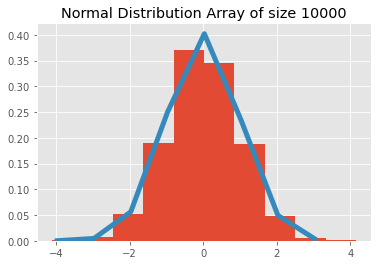

In [676]:
plt.title("Normal Distribution Array of size 10000")
plt.hist(normal_array, bins=10, density=True)
plt.plot(x, pdf, linewidth=5)
plt.show()

### 20 bins

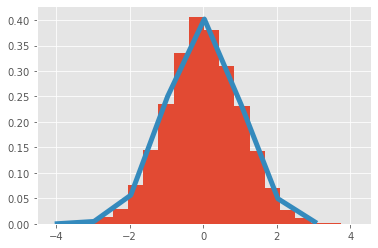

In [677]:
plt.hist(normal_array, bins=20, density=True)
plt.plot(x, pdf, linewidth=5)
plt.show()

### 40 bins

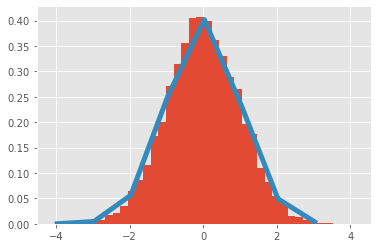

In [678]:
plt.hist(normal_array, bins=40, density=True)
plt.plot(x, pdf, linewidth=5)
plt.show()

# Part 2

## Task 1

Read the CSV data and display the first 5 rows.

In [679]:
data = pd.read_csv("2021-PM2.5.csv")
data.head() # Display the first n=5 rows

,Date,BV-MC,CV-MC,ED-MC,EN-MC,H3-MC,H3-MC-CO,HA-MC,HC-MC,HV-MC,...,NR-MC,RP-MC,RS-MC,RS-MC-CO,SF-MC,SM-MC-CO,SM-MC-CO2,UT-MC,UT-MC-CO,V4-MC
0,2021-01-01 00:00:00,40.0,26.5,30.1,5.4,7.8,6.8,24.6,2.1,42.6,...,30.2,27.6,12.4,12.0,20.9,41.2,46.5,21.7,NaN,14.6
1,2021-01-01 01:00:00,41.2,25.5,31.2,4.9,5.4,3.8,30.4,2.1,33.8,...,36.8,26.4,13.8,13.4,20.5,42.4,49.3,13.3,NaN,15.5
2,2021-01-01 02:00:00,27.0,26.0,27.3,5.5,4.4,3.5,30.5,2.2,41.3,...,39.8,26.4,17.6,15.6,23.0,45.4,52.5,19.4,NaN,17.2
3,2021-01-01 03:00:00,27.1,25.5,16.8,6.7,3.3,2.6,31.1,2.9,37.6,...,33.9,36.1,19.5,16.5,25.6,38.1,42.8,27.7,NaN,14.9
4,2021-01-01 04:00:00,30.2,26.0,8.6,6.3,3.1,2.6,34.5,3.7,24.8,...,34.2,33.6,18.6,15.8,24.0,40.4,45.5,27.9,NaN,13.7


Select and display BV-MC station data.

In [680]:
bv_data = data[["Date", "BV-MC"]]
bv_data.head()

,Date,BV-MC
0,2021-01-01 00:00:00,40.0
1,2021-01-01 01:00:00,41.2
2,2021-01-01 02:00:00,27.0
3,2021-01-01 03:00:00,27.1
4,2021-01-01 04:00:00,30.2


Analyse the data

In [681]:
# Check data type
print(type(bv_data["Date"][0]))
print(type(bv_data["BV-MC"][0]))
data_array = bv_data["BV-MC"]

<class 'str'>
<class 'numpy.float64'>


In [682]:
# Calculate mean and standard deviation
data_list = np.array(data_array.values.tolist())

# custom_mean = calculateMean(data_list)
# custom_sd = calculateSd(data_list, custom_mean)
numpy_mean = np.mean(data_array)
numpy_sd = np.std(data_array)

print("NumPy Mean       :", numpy_mean)
print("NumPy SD         :", numpy_sd)

NumPy Mean       : 9.287264488433111
NumPy SD         : 9.804000628046424


The average PM2.5 for BV-MC station is 9.28, while the standard deviation is 9.80.

## Task 2

Set index and fix dtype

In [683]:
bv_data.index = pd.to_datetime(bv_data.Date)
bv_data.head()

,Date,BV-MC
Date,,
2021-01-01 00:00:00,2021-01-01 00:00:00,40.0
2021-01-01 01:00:00,2021-01-01 01:00:00,41.2
2021-01-01 02:00:00,2021-01-01 02:00:00,27.0
2021-01-01 03:00:00,2021-01-01 03:00:00,27.1
2021-01-01 04:00:00,2021-01-01 04:00:00,30.2


Plot the data

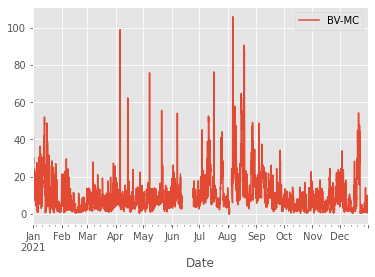

In [684]:
plt.style.use('ggplot')
bv_data[["BV-MC"]].plot(kind="line")
plt.show()

## Task 3

### Plot monthly average as a bar graph

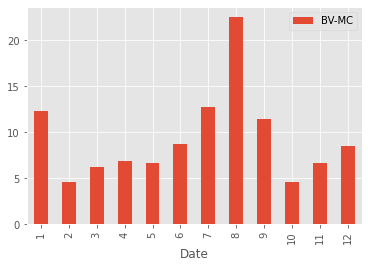

In [685]:
monthly_average = bv_data.groupby(lambda date: date.month).agg(np.mean)
monthly_average.plot(kind="bar")
plt.show()

August seems to have the highest PM2.5 levels and February the lowest.

### Plot hourly average over the year

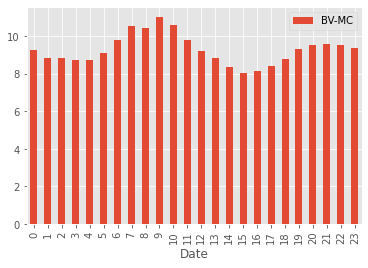

In [686]:
hourly_average = bv_data.groupby(lambda date: date.hour).agg(np.mean)
hourly_average.plot(kind="bar")
plt.show()

Seems like the highest PM2.5 levels are during the rush hour start, i.e. 09:00 AM, while the lowest is at 3 PM.

## Task 4

### Monthly Box and Whisker Plot

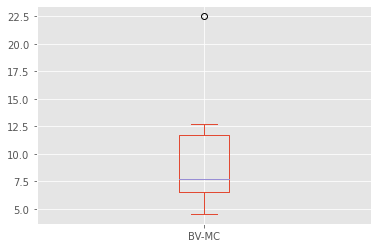

In [687]:
monthly_average.plot(kind="box")
plt.show()

Outliers are present in this data set, and it implies that the PM2.5 values are significantly less compared to it.

### Hourly Box and Whisker plot

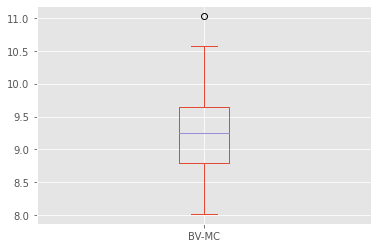

In [688]:
hourly_average.plot(kind="box")
plt.show()

Outliers are present in this data set, and it implies that the PM2.5 values are slightly less compared to it. Also that the pollution occurs mostly between 8 AM to about 10:30 AM.